In [9]:
import pandas as pd
df=pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
X =pd.get_dummies(df.drop('y', axis=1))
y = df.iloc[:, df.columns == 'y']


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

/opt/anaconda3/envs/CSC293/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [13]:
y_pred=rf.predict(X_test)

In [14]:
rf.score(X_test, y_test)

0.9140568099053168

In [15]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7289
         yes       0.68      0.48      0.56       949

    accuracy                           0.91      8238
   macro avg       0.81      0.72      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [16]:
features = pd.DataFrame(rf.feature_importances_, index=X.columns)
#print every row of features
print(features.to_string())

                                      0
age                            0.079205
duration                       0.281924
campaign                       0.039972
pdays                          0.025432
previous                       0.012802
emp.var.rate                   0.023151
cons.price.idx                 0.022580
cons.conf.idx                  0.023781
euribor3m                      0.100383
nr.employed                    0.042686
job_admin.                     0.012219
job_blue-collar                0.008347
job_entrepreneur               0.003934
job_housemaid                  0.003329
job_management                 0.006402
job_retired                    0.005752
job_self-employed              0.004051
job_services                   0.006303
job_student                    0.004254
job_technician                 0.009517
job_unemployed                 0.003495
job_unknown                    0.001723
marital_divorced               0.006878
marital_married                0.011711


<Figure size 800x600 with 0 Axes>

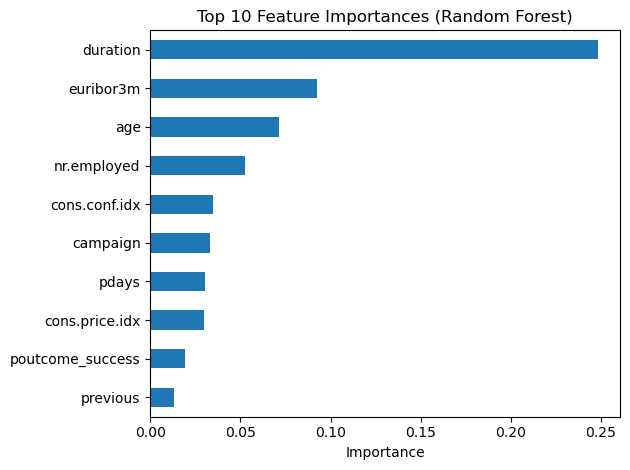

In [17]:

import matplotlib.pyplot as plt

# Feature importance values from user
feature_importances = {
    'duration': 0.248156,
    'euribor3m': 0.092485,
    'age': 0.071362,
    'cons.conf.idx': 0.034717,
    'campaign': 0.032897,
    'cons.price.idx': 0.029625,
    'pdays': 0.030293,
    'nr.employed': 0.052410,
    'poutcome_success': 0.019046,
    'previous': 0.013257
}

# Create a DataFrame and sort by importance
top_features_df = pd.DataFrame.from_dict(feature_importances, orient='index', columns=['Importance'])
top_features_df = top_features_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
top_features_df.plot(kind='barh', legend=False)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[7078  211]
 [ 497  452]]
